In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import pandas as pd
from sklearn.tree import ExtraTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from numpy import random 



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Data Preparation


> Loading Dataset




In [0]:
#loading dataset

wine = datasets.load_wine()
#I only take the first two features.
df = pd.DataFrame(wine.data, columns=wine.feature_names)
X=wine.data[:,:2]
Y=wine.target

h=0.02

# Create color maps

cmap_light = ListedColormap(['#d6b4fc', '#75bbfd', '#ffb7ce'])
cmap_bold = ListedColormap(['#9a0eea', '#0504aa', '#fe46a5'])




> Split Dataset Into Train, Validation and Test Set




In [0]:
#spit dataset

X_train_nost,X_test_nost,y_train,y_test = train_test_split(X,Y,test_size=0.5,random_state=1)
X_val_nost,X_test_nost,y_val,y_test = train_test_split(X_test_nost,y_test,test_size=0.6,random_state=1)




> Standardization of the data



In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_nost)
X_val = scaler.transform(X_val_nost)
X_test = scaler.transform(X_test_nost)

#KNearest-Neigbors 






##Training the model


>Apply K-NN to different values of K and evaluate the result on the validation set

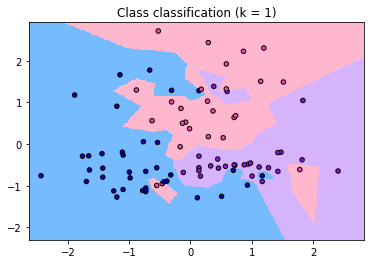

Accuracy for k = 1 is 0.6857142857142857


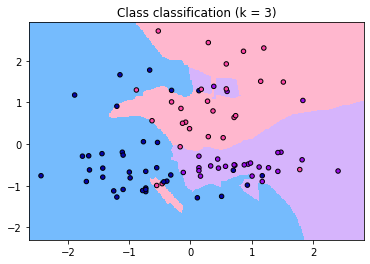

Accuracy for k = 3 is 0.7714285714285715


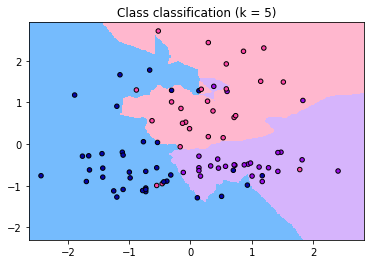

Accuracy for k = 5 is 0.8


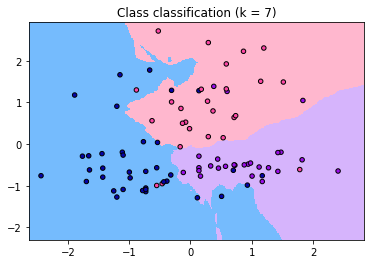

Accuracy for k = 7 is 0.7714285714285715


In [5]:
#apply k-NN to VALIDATION
i=0
acc_array=[0,0,0,0]
for K in [1,3,5,7]: 
    clf=neighbors.KNeighborsClassifier(K)
    clf.fit(X_train,y_train) #fit is used to train your pattern with some training data
    
    
    
    
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_val[:, 0].min() - 1, X_val[:, 0].max() + 1
    y_min, y_max = X_val[:, 1].min() - 1, X_val[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max,h),
                         np.arange(y_min, y_max,h))
    
    y_predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    y_p=clf.predict(X_val)
    # Put the result into a color plot
    y_predicted = y_predicted.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, y_predicted, cmap=cmap_light)
    
    
    #plot the training data
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Class classification (k = %i)"
              % (K))
    plt.show()

   
    
    acc= accuracy_score(y_val,y_p)
    print("Accuracy for k = {} is {}".format(K,acc))
    
    acc_array[i]=acc
    i=i+1
    






> Plot Accurancy on K variation





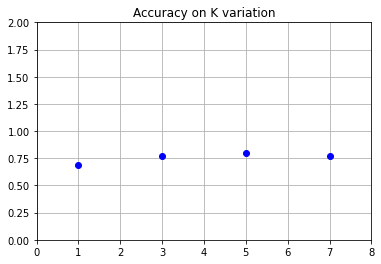

In [6]:
#plot accurancy when K varies
plt.title("Accuracy on K variation")
plt.plot([1, 3, 5, 7],acc_array, 'bo')
plt.axis([0, 8, 0, 2])
plt.grid("true")
plt.show()

##Testing the model


> I test the model on the test set using K best value (K=3)



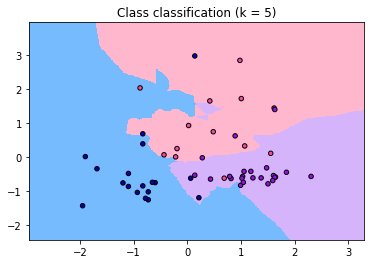

Accuracy for k = 5 is 0.7962962962962963


In [7]:
#I choose K=5 and I apply it to the test set 

K=5

clf=neighbors.KNeighborsClassifier(K)
clf.fit(X_train,y_train)   

    


x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max,h),
                         np.arange(y_min, y_max,h))
    
y_predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
y_predicted = y_predicted.reshape(xx.shape)
y_pr=clf.predict(X_test)
plt.figure()
plt.pcolormesh(xx, yy, y_predicted, cmap=cmap_light)
    
    
#plot the training data
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Class classification (k = %i)"
              % (K))
plt.show()

acc= accuracy_score(y_test,y_pr)
print("Accuracy for k = {} is {}".format(K,acc))
    


#Linear SVM



## Training the model



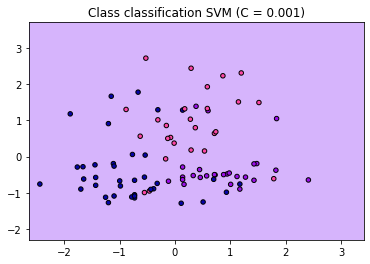

Accuracy for C= 0.001 on the validation set is 0.45714285714285713


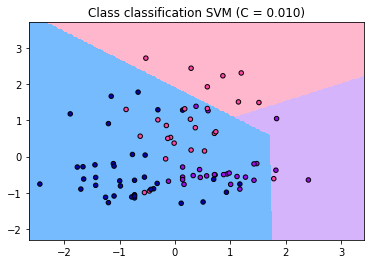

Accuracy for C= 0.01 on the validation set is 0.5142857142857142


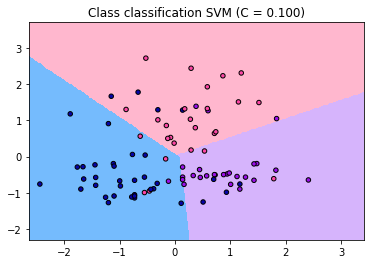

Accuracy for C= 0.1 on the validation set is 0.8


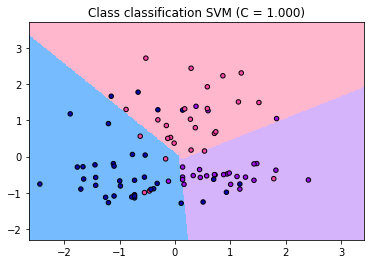

Accuracy for C= 1 on the validation set is 0.8


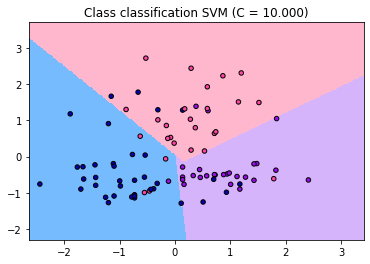

Accuracy for C= 10 on the validation set is 0.8


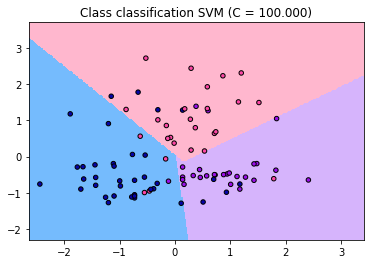

Accuracy for C= 100 on the validation set is 0.8


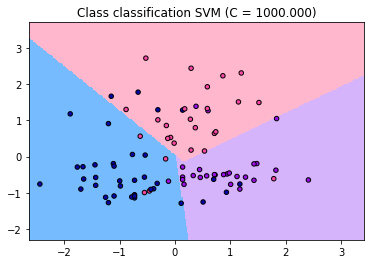

Accuracy for C= 1000 on the validation set is 0.8


In [8]:
#Linear SVN
from sklearn import svm
i=0
acc_array_SVM=[0,0,0,0,0,0,0]


for C in [0.001, 0.01, 0.1, 1, 10, 100,1000]:
    #train the data on the training set
    clf=svm.SVC(kernel='linear', C=C)
    clf.fit(X_train,y_train) #fit is used to train your pattern with some training data
    
    #evaluate the method on the validation set 
    x_min, x_max = X_val[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_val[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max,h),
                         np.arange(y_min, y_max,h))
    
    y_predictedSVM = clf.predict(np.c_[xx.ravel(), yy.ravel()])
   
     # Put the result into a color plot
    y_predictedSVM = y_predictedSVM.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, y_predictedSVM, cmap=cmap_light)
    
   
    #plot the training data (training_set)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Class classification SVM (C = %.3f)"
              % (C))
    plt.show()
    
       
    
    #Evaluate the accurancy for each value of C
   
    y_p_SVM=clf.predict(X_val)
    acc_array_SVM[i]= accuracy_score(y_val,y_p_SVM)
    print("Accuracy for C= {} on the validation set is {}".format(C,acc_array_SVM[i]))
    
    i=i+1
    




> I plot accurancy change on C variation



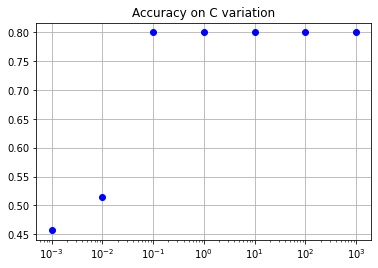

In [9]:
#plot accurancy when C varies
plt.title("Accuracy on C variation")
plt.plot([0.001, 0.01, 0.1, 1, 10, 100,1000],acc_array_SVM,"bo")

plt.xscale('log')
plt.grid("true")
plt.show()



##Testing the model 



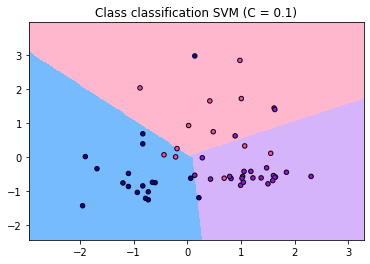

accurancy=0.7962962962962963


In [10]:
#I choose C=0.1 and evaluate the model on the test set 

C=0.1


clf=svm.SVC(kernel='linear', C=C)
clf.fit(X_train,y_train) #fit is used to train your pattern with some training data
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max,h),
                         np.arange(y_min, y_max,h))
    
y_predictedSVM_bestC = clf.predict(np.c_[xx.ravel(), yy.ravel()])
   
# Put the result into a color plot
y_predictedSVM_bestC = y_predictedSVM_bestC.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, y_predictedSVM_bestC, cmap=cmap_light)
    
    
#plot the test data
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold,edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Class classification SVM (C = 0.1)")
plt.show()

y_p_b_c=clf.predict(X_test)
accLinear_best= accuracy_score(y_test,y_p_b_c)
print("accurancy={}".format(accLinear_best))



#SVM with RBF kernel

##Training the model

> Training the model for different values of C

 Results of data training on training set


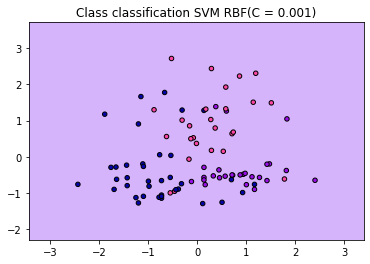

accuracy for C= 0.001 on the validation set for rbf kernel is 0.45714285714285713


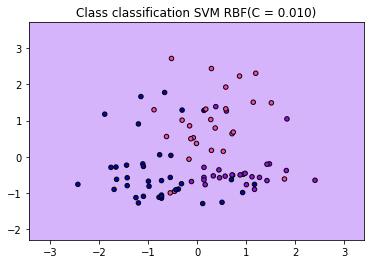

accuracy for C= 0.01 on the validation set for rbf kernel is 0.45714285714285713


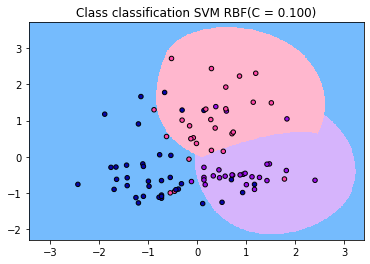

accuracy for C= 0.1 on the validation set for rbf kernel is 0.8


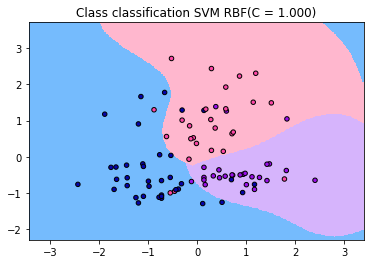

accuracy for C= 1 on the validation set for rbf kernel is 0.8


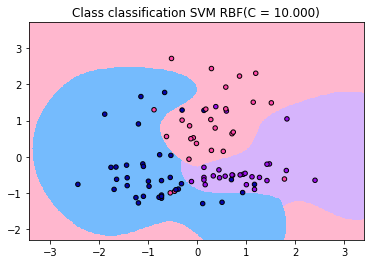

accuracy for C= 10 on the validation set for rbf kernel is 0.7428571428571429


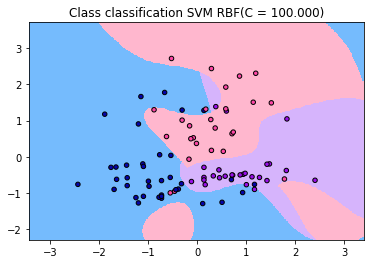

accuracy for C= 100 on the validation set for rbf kernel is 0.7428571428571429


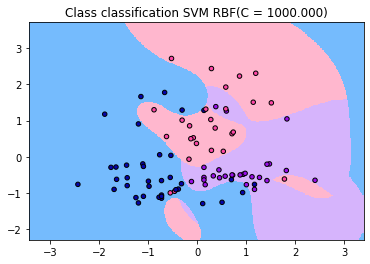

accuracy for C= 1000 on the validation set for rbf kernel is 0.6285714285714286


In [11]:
#SVN kernel=RBF
from sklearn import svm
i=0
acc_array_SVM_RBF=[0,0,0,0,0,0,0]

print( " Results of data training on training set")

for C in [0.001, 0.01, 0.1, 1, 10, 100,1000]:
    #train the data on the training set
    clf=svm.SVC(kernel='rbf', C=C)
    clf.fit(X_train,y_train) #fit is used to train your pattern with some training data
    
    #evaluate the method on the validation set
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max,h),
                         np.arange(y_min, y_max,h))
    
    y_predictedSVM_rbf = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
     # Put the result into a color plot
    y_predictedSVM_rbf = y_predictedSVM_rbf.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, y_predictedSVM_rbf, cmap=cmap_light)
    
    
    #plot the training data (training_set)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Class classification SVM RBF(C = %.3f)"
              % (C))
    plt.show()
    
    
    

    #Evaluate the method on the validation set
   
    y_p_SVM_rbf=clf.predict(X_val)
    accSVM_rbf= accuracy_score(y_val,y_p_SVM_rbf)
    print("accuracy for C= {} on the validation set for rbf kernel is {}".format(C,accSVM_rbf))
    
    acc_array_SVM_RBF[i]=accSVM_rbf
    i=i+1

>Evaluating the accurancy for different values of C

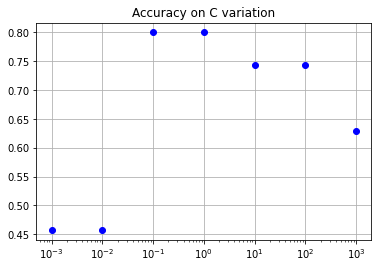

In [12]:
#plot accurancy when C varies
plt.title("Accuracy on C variation")
plt.plot([0.001, 0.01, 0.1, 1, 10, 100,1000],acc_array_SVM_RBF,"bo")

plt.xscale('log')
plt.grid("true")
plt.show()

##Testing the model

>Evaluate the model on the test set

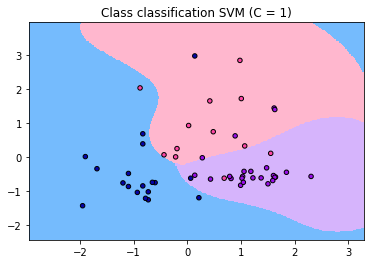

accurancy=0.8333333333333334


In [13]:
#I choose C=1 and evaluate the model on the test set #100

C=1

 #train the data on the training set
clf=svm.SVC(kernel='rbf', C=C)
clf.fit(X_train,y_train) #fit is used to train your pattern with some training data
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max,h),
                         np.arange(y_min, y_max,h))
    
y_predictedSVM_bestC_rbf= clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
# Put the result into a color plot
y_predictedSVM_bestC_rbf = y_predictedSVM_bestC_rbf.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, y_predictedSVM_bestC_rbf, cmap=cmap_light)
    
y_p_b_SVM_rbf=clf.predict(X_test)  
#plot the test data
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold,edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Class classification SVM (C = 1)")
plt.show()

accSVM_best= accuracy_score(y_test,y_p_b_SVM_rbf)
print("accurancy={}".format(accSVM_best))

##Grid search for tuning Hyperparameters

 Highest accurancy found is: 0.8285714285714286


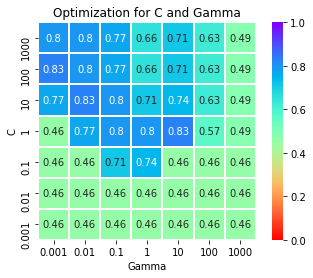

In [14]:

C_values, Gamma_values = [0.001, 0.01, 0.1, 1, 10, 100,1000],[0.001, 0.01, 0.1, 1, 10, 100,1000]

models = [] 
highest_accuracy = -1 
hyperparameters = np.empty(shape=(len(C_values), len(Gamma_values)))

for c in C_values:
        for gamma in Gamma_values:
            
            rbf_SVM = svm.SVC(C = c, gamma=gamma, kernel='rbf')
            rbf_SVM.fit(X_train, y_train) 
            Y_predi = rbf_SVM.predict(X_val)
            accuracy = rbf_SVM.score(X_val, y_val)
            
            
            if(accuracy > highest_accuracy): 
                highest_accuracy = accuracy
    
            hyperparameters[C_values.index(c), Gamma_values.index(gamma)] = accuracy


plt.figure(8)
plt.xscale('linear')
axes = sns.heatmap(hyperparameters, 
                    cmap='rainbow_r', 
                    linewidth=1, 
                    xticklabels= C_values,
                    yticklabels=Gamma_values, 
                    annot=True, 
                    vmin=0, vmax=1, 
                    square=True) 
axes.invert_yaxis()
axes.set_xlabel('Gamma')
axes.set_ylabel('C')
axes.set_title("Optimization for C and Gamma")

print(" Highest accurancy found is: {}".format(highest_accuracy))


##Testing the Model on the best hyperparameters

The best Hyperparameters are: C= 1 , Gamma= 10


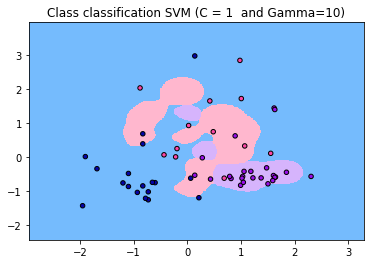

In [15]:
#I search for the best Hyperparameters


C_bests_list = []
Gamma_bests_list = []

for c in C_values:
        for gamma in Gamma_values:
            if(hyperparameters[C_values.index(c), Gamma_values.index(gamma)] == highest_accuracy): 
                C_bests_list.append(c) 
                Gamma_bests_list.append(gamma) 


C_best = min(C_bests_list)
Gamma_best = Gamma_bests_list[C_bests_list.index(C_best)]

print("The best Hyperparameters are: C=", C_best, ", Gamma=", Gamma_best)



#I choose C=1 and Gamma=10 and evaluate the model on the test set

C=1
Gamma=10

 #train the data on the training set
clf=svm.SVC(kernel='rbf',gamma=Gamma, C=C)
clf.fit(X_val,y_val) #fit is used to train your pattern with some training data
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max,h),
                         np.arange(y_min, y_max,h))
    
y_predictedSVM_bestC_rbf= clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
# Put the result into a color plot
y_predictedSVM_bestC_rbf = y_predictedSVM_bestC_rbf.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, y_predictedSVM_bestC_rbf, cmap=cmap_light)
    
    
#plot the test data
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold,edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Class classification SVM (C = 1  and Gamma=10)")
plt.show()

#K-Fold Method

##Grid search for hyperparameters tuning


 Highest accurancy found is: 0.7857142857142857


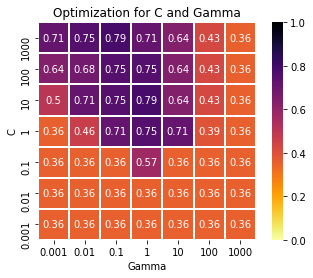

In [16]:
#Splitting dataset in 70% training data and 30% test data

from sklearn.model_selection import KFold

X_train_ns,X_test_ns,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1 )

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_ns)
X_test = scaler.transform(X_test_ns)

C_values, Gamma_values = [0.001, 0.01, 0.1, 1, 10, 100,1000],[0.001, 0.01, 0.1, 1, 10, 100,1000]


K = 5
fold_length = int(len(X_train)/K)
Xfolds_values = []
Yfolds_values = []

hyperparameters_list = []

for i in range(K-1):
    Xfolds_values += [X_train[i*fold_length:(i+1)*fold_length]]
    Yfolds_values += [y_train[i*fold_length:(i+1)*fold_length]]

Xfolds_values += [X_train[(K-1)*fold_length:len(X_train)]] 
Yfolds_values +=[y_train[(K-1)*fold_length:len(X_train)]]


hyperparameters_values = []

for k in range(K):

    
    Xfolds_train_values = []
    Yfolds_train_values = []

   
    for i in range(K):
        if i!=k:
            Xfolds_train_values.append(Xfolds_values[i])
            Yfolds_train_values.append(Yfolds_values[i])
    
    
    Xfolds_train = np.concatenate(Xfolds_train_values, axis=0)
    Yfolds_train = np.concatenate(Yfolds_train_values, axis=0)
    
    models = [] 
    highest_accuracy = -1 
    hyperparameters = np.empty(shape=(len(C_values), len(Gamma_values)))

    for c in C_values:
        for gamma in Gamma_values:
            
            rbf_SVM = svm.SVC(C = c, gamma=gamma, kernel='rbf')
            rbf_SVM.fit(Xfolds_train, Yfolds_train) 
            Y_predi = rbf_SVM.predict(Xfolds_values[k])
            accuracy = rbf_SVM.score(Xfolds_values[k], Yfolds_values[k])
            
            
            if(accuracy > highest_accuracy): 
                highest_accuracy = accuracy
    
            hyperparameters[C_values.index(c), Gamma_values.index(gamma)] = accuracy




    
hyperparameters_values.append(hyperparameters)





# Compute the average accuracy
hyperparameters_avg = np.empty(shape=(len(C_values), len(Gamma_values))) 
best_accuracy = 0

for c in C_values:
    for gamma in Gamma_values:
            accuracy_sum = 0.0
            accuracy_count = 0.0
            
            for hp in hyperparameters_values:
                accuracy_sum += hp[C_values.index(c), Gamma_values.index(gamma)]
                accuracy_count += 1.0

            accuracy_avg = accuracy_sum/accuracy_count
            hyperparameters_avg[C_values.index(c), Gamma_values.index(gamma)] = accuracy_avg

            if accuracy_avg>best_accuracy:
                best_accuracy = accuracy_avg

plt.figure(8)
plt.xscale('linear')
axes = sns.heatmap(hyperparameters_avg, 
                    cmap='inferno_r', 
                    linewidth=1, 
                    xticklabels=C_values, 
                    yticklabels=Gamma_values, 
                    annot=True, 
                    vmin=0, vmax=1, 
                    square=True) 
axes.invert_yaxis()
axes.set_xlabel('Gamma')
axes.set_ylabel('C')
axes.set_title("Optimization for C and Gamma")


print(" Highest accurancy found is: {}".format(highest_accuracy))

##Testing the Model on the best hyperparameters

The best Hyperparameters are: C= 10 , Gamma= 1


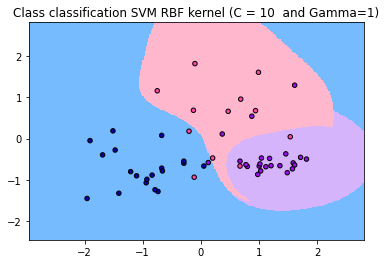

In [17]:
#I search for the best Hyperparameters


C_bests_list = []
Gamma_bests_list = []

for c in C_values:
        for gamma in Gamma_values:
            if(hyperparameters_avg[C_values.index(c), Gamma_values.index(gamma)] == highest_accuracy): 
                #
                C_bests_list.append(c) 
                Gamma_bests_list.append(gamma) 


C_best = min(C_bests_list)
Gamma_best = Gamma_bests_list[C_bests_list.index(C_best)]

print("The best Hyperparameters are: C=", C_best, ", Gamma=", Gamma_best)






#I choose C=1 and Gamma=1 and evaluate the model on the test set

C=1
Gamma=1

#train the data on the training set
clf=svm.SVC(kernel='rbf',gamma=Gamma, C=C)
clf.fit(X_val,y_val) #fit is used to train your pattern with some training data
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max,h),
                         np.arange(y_min, y_max,h))
    
y_predictedSVM_bestC_rbf= clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
# Put the result into a color plot
y_predictedSVM_bestC_rbf = y_predictedSVM_bestC_rbf.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, y_predictedSVM_bestC_rbf, cmap=cmap_light)
    
    
#plot the test data
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold,edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Class classification SVM RBF kernel (C = 10  and Gamma=1)")#C=1000,Gamma0.1
plt.show()




#(EXTRA POINT) Best two feautures extraction from the dataset 


> By using ExtraTreesClassifier I extract those features



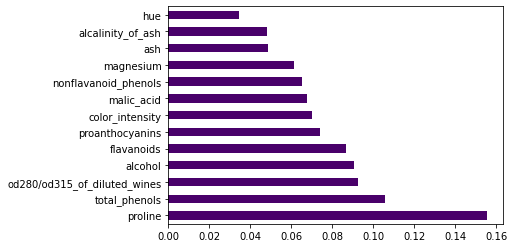

In [18]:
X = df.iloc[:,0:13]  
y = df.iloc[:,-1]    
model = ExtraTreeClassifier()
model.fit(X,y) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh',cmap='RdPu_r')

plt.show()

In [0]:
X = df[['proline', 'flavanoids']].values
y = wine['target']

In [0]:
X_train_val, X_test, y_train_val, y_test  = train_test_split(X, y, test_size=0.3, random_state=1)
X_train, X_val, y_train, y_val  = train_test_split(X_train_val, y_train_val, test_size=0.33, random_state=1)

In [0]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s = scaler.transform(X_val)

X_train_val_s = scaler.fit_transform(X_train_val)
X_test_s = scaler.transform(X_test)

##Linear SVM Test

In [22]:
param = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
svc = svm.SVC(kernel='linear', C=C)
model = GridSearchCV(svc, param)
model.fit(X_train_val_s, y_train_val)
best_model_train = model.best_estimator_
print("Best model:")
print(model.best_params_)

Best model:
{'C': 10}


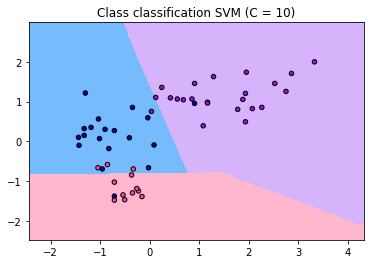

accurancy=0.8888888888888888


In [26]:
C=10
clf=svm.SVC(kernel="linear",C=C)
clf.fit(X_train_val_s, y_train_val) #fit is used to train your pattern with some training data
x_min, x_max = X_test_s[:, 0].min() - 1, X_test_s[:, 0].max() + 1
y_min, y_max = X_test_s[:, 1].min() - 1, X_test_s[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max,h),
                         np.arange(y_min, y_max,h))
    
y_predictedSVM_bestC = clf.predict(np.c_[xx.ravel(), yy.ravel()])
   
# Put the result into a color plot
y_predictedSVM_bestC = y_predictedSVM_bestC.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, y_predictedSVM_bestC, cmap=cmap_light)
    
    
#plot the test data
plt.scatter(X_test_s[:, 0], X_test_s[:, 1], c=y_test, cmap=cmap_bold,edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Class classification SVM (C = 10)")
plt.show()

y_p_b_c=clf.predict(X_test_s)
accLinear_best= accuracy_score(y_test,y_p_b_c)
print("accurancy={}".format(accLinear_best))

##RBF kernel SVM Test

In [24]:
parameters = {'gamma':[1e-9, 1e-6, 1e-3, 1, 10],
 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
svc = SVC()
model = GridSearchCV(svc, parameters) #default 5-fold validation
model.fit(X_train_val_s, y_train_val)
best_model_train_val = model.best_estimator_
print("Best model:")
print(model.best_params_)

Best model:
{'C': 10, 'gamma': 1}


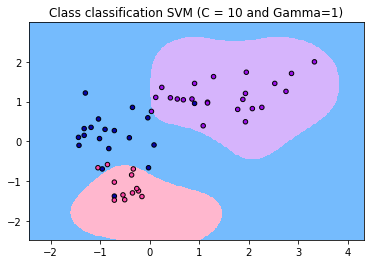

accurancy=0.9074074074074074


In [25]:
C=10
Gamma=1
 #train the data on the training set
clf=svm.SVC(kernel='rbf',C=C, gamma=Gamma)
clf.fit(X_train_val_s, y_train_val) #fit is used to train your pattern with some training data
x_min, x_max = X_test_s[:, 0].min() - 1, X_test_s[:, 0].max() + 1
y_min, y_max = X_test_s[:, 1].min() - 1, X_test_s[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max,h),
                         np.arange(y_min, y_max,h))
    
y_predictedSVM_bestC_rbf= clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
# Put the result into a color plot
y_predictedSVM_bestC_rbf = y_predictedSVM_bestC_rbf.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, y_predictedSVM_bestC_rbf, cmap=cmap_light)
    
y_p_b_SVM_rbf=clf.predict(X_test_s)  
#plot the test data
plt.scatter(X_test_s[:, 0], X_test_s[:, 1], c=y_test, cmap=cmap_bold,edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Class classification SVM (C = 10 and Gamma=1)")
plt.show()

accSVM_best= accuracy_score(y_test,y_p_b_SVM_rbf)
print("accurancy={}".format(accSVM_best))